In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

## First, lets load Cpx data

In [9]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
Baker_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="Baker"]
Baker_Cpx['Sample_ID_Cpx']="Baker"

C:\Users\penny\AppData\Local\Temp\ipykernel_22744\2879000667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baker_Cpx['Sample_ID_Cpx']="Baker"


In [10]:
len(Baker_Cpx)

230

In [11]:
WangCopy=Baker_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=Baker_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)
Combo_Cpx['Sample_ID_Cpx']="Baker"

## Choose Crustal density

In [12]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


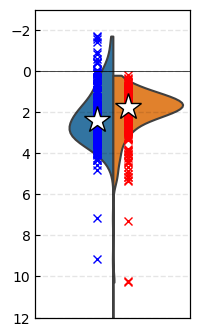

In [15]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Baker', 'Baker', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=["Baker"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")]),  
         '*k', mfc='w', ms=20)



ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.set_xticks([])
fig.savefig('Baker_Cpx.png', dpi=200)

In [17]:
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")]))

2.4020207628418078


In [16]:
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")]))

1.757351990049751


## Amphibole

10
10


C:\Users\penny\AppData\Local\Temp\ipykernel_22744\3000767137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baker_Amp['Sample_ID_Amp']="Baker"
C:\Users\penny\AppData\Local\Temp\ipykernel_22744\3000767137.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baker_Amp_Filt['Sample_ID_Amp']="Baker"
C:\Users\penny\AppData\Local\Temp\ipykernel_22744\3000767137.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

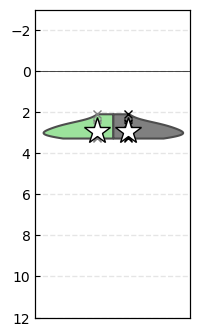

In [7]:

with open(r'../Combo_Amp.pkl', 'rb') as f:
            All_Amp=load(f)
Baker_Amp=All_Amp.loc[All_Amp['Volcano']=="Baker"]
Baker_Amp['Sample_ID_Amp']="Baker"

with open(r'../Combo_Amp_Filt.pkl', 'rb') as f:
            All_Amp_Filt=load(f)
Baker_Amp_Filt=All_Amp_Filt.loc[All_Amp_Filt['Volcano']=="Baker"]
Baker_Amp_Filt['Sample_ID_Amp']="Baker"
Baker_Amp['Class']='Unfilt'
Baker_Amp_Filt['Class']='filt'

Combo_Amp=pd.concat([Baker_Amp_Filt, Baker_Amp], axis=0)

print(sum(Baker_Amp['P_kbar_calc']>-10))
print(sum(Baker_Amp_Filt['P_kbar_calc']>-10))

import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()


# ax = sns.violinplot(y=Baker_Amp['P_Ridolfi21'],
#                 inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)
sns.violinplot(x="Volcano", y="P_Ridolfi21",  cut=0,  inner=None, hue="Class",
            data=Combo_Amp, split=True, ax=ax1, width=0.9,  palette=['lightgreen', 'grey'],
               stick=True)


ax1.plot(-0.1+0*Baker_Amp_Filt['P_Ridolfi21'],
  Baker_Amp_Filt['P_Ridolfi21'],
         'x', mec='grey')
ax1.plot(+0.1+0*Baker_Amp['P_Ridolfi21'],
  Baker_Amp['P_Ridolfi21'],
         'x', mec='black')

ax1.plot(-0.1,
  np.nanmedian(Baker_Amp_Filt['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot(+0.1,
  np.nanmedian(Baker_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
ax1.get_legend().remove()
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Baker_Amp.png', dpi=200)

In [18]:
np.nanmedian(Baker_Amp_Filt['P_Ridolfi21'])

2.918438625008367

In [15]:
sum(Baker_Amp['P_kbar_calc']>-10)

10

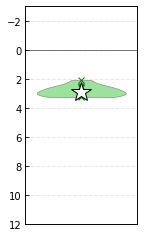

In [11]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()


ax = sns.violinplot(y=Baker_Amp['P_Ridolfi21'],
                inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)


ax1.plot(0*Baker_Amp['P_Ridolfi21'],
  Baker_Amp['P_Ridolfi21'],
         'x', mec='green')

ax1.plot(0,
  np.nanmedian(Baker_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
# ax1.plot(0,
#   np.nanmean(Baker_Amp['P_Ridolfi21']),
#          'pk', mfc='w', ms=5)
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Baker_Amp.png', dpi=200)

In [19]:
## Load in LP data

In [13]:
LPs=pd.read_excel(r'../Geophysics_Sept2022.xlsx',
                  sheet_name="LPEarthquakes")
LPs_Baker=LPs.loc[LPs['Volcano']=="Mount Baker"]
LPs_Baker

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6
23,Mount Baker,48.7767,25.105868,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
24,Mount Baker,48.7767,24.621900,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
25,Mount Baker,48.7767,22.686025,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
26,Mount Baker,48.7767,27.041742,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
27,Mount Baker,48.7767,27.949183,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
28,Mount Baker,48.7767,27.707199,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
29,Mount Baker,48.7767,27.888687,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
30,Mount Baker,48.7767,28.251664,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
31,Mount Baker,48.7767,22.383545,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
32,Mount Baker,48.7767,19.298246,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN


In [21]:
LPs['Volcano'].unique()

array(['Lassen', 'Medicine Lake', 'Three sisters', 'Crater Lake',
       'Mount Baker', 'Glacier Peak', 'Mount Ranier',
       'Mount Saint Helens'], dtype=object)

## Expet plot

## Raw template for geophysics and Exp Pet

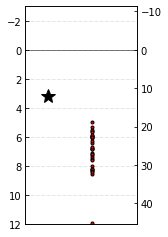

In [14]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches

av_stat_level=2.000
summit_height=3.2876
dif=summit_height-av_stat_level
## Hodge and Crider - GPS.
ax2.plot(0, 5.8+dif, 12, '*k', mfc='black', ms=15)

ax2.plot(LPs_Baker['Depth']*0+0.6, LPs_Baker['Depth']+summit_height, 'ok', mfc='red', ms=3)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([-0.3, 1.2])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Geophy_Baker.png', dpi=200, bbox_inches="tight")

In [4]:
## Same for amphibole

Baker_read_Amp=pt.import_excel('Baker.xlsx', sheet_name='Amp_All')
Baker_Input_Amp=Baker_read_Amp['my_input']
Baker_Amp=Baker_read_Amp['Amps']
Baker_Amp['Sample_ID_Amp']='Baker'
Baker_Amp_copy=Baker_Amp.copy()
Baker_Amp_comps=pt.get_amp_sites_from_input(amp_comps=Baker_Amp)
# Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
Baker_Amp_filt1=Baker_Amp.loc[( (Baker_Amp_comps['cation_sum_All'].between(15, 16)) )]
Baker_Amp_class=pt.classify_phases(df=Baker_Amp_filt1, return_end_members=True,
                        str_to_drop='_Amp')
print(Baker_Amp_class['Phase_Min_Group_ML'].unique())
Baker_Amp_filt=Baker_Amp_filt1.loc[Baker_Amp_class['Phase_Min_Group_ML']=="Amp"].reset_index(drop=True)
Baker_Amp_Press_NoFilter=pt.calculate_amp_only_press(amp_comps=Baker_Amp_filt, 
                        Ridolfi_Filter=False, equationP="P_Ridolfi2021")
Baker_Amp_Press_Filter=pt.calculate_amp_only_press(amp_comps=Baker_Amp_filt, 
                        Ridolfi_Filter=True, equationP="P_Ridolfi2021")


['Amp']


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
len(Baker_Amp_Press_NoFilter)

12

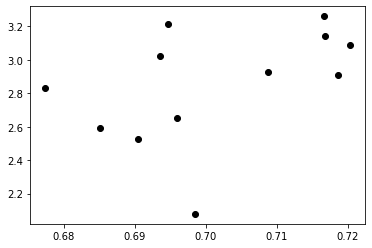

In [27]:
plt.plot(
         (Baker_Amp_filt['MgO_Amp']/40.3044)/(Baker_Amp_filt['MgO_Amp']/40.3044+Baker_Amp_filt['FeOt_Amp']/71.844),
    Baker_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [28]:
Amp_Chem=pt.calculate_amp_only_melt_comps(amp_comps=Baker_Amp_filt)

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:229: UserWarning: You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)
  w.warn('You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)')


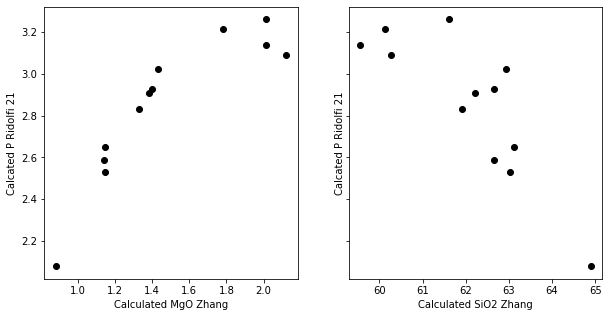

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(
         Amp_Chem['MgO_Eq9_Zhang17'],
    Baker_Amp_Press_NoFilter['P_kbar_calc'], 'ok')
ax1.set_xlabel('Calculated MgO Zhang')
ax1.set_ylabel('Calcated P Ridolfi 21')

ax2.set_xlabel('Calculated SiO2 Zhang')
ax2.set_ylabel('Calcated P Ridolfi 21')

ax2.plot(
         Amp_Chem['SiO2_Eq1_Zhang17'],
    Baker_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [30]:
#None Filtered
Baker_Amp_Press_All=Baker_Amp_Press_NoFilter.copy()
Baker_Amp_Press_All['Preferred_P']=Baker_Amp_Press_All['P_kbar_calc']
Baker_Amp_Press_All['Model']="Ridolfi not filtered"
Baker_Amp_Press_All['Sample_ID_Amp']="Baker domefield"

Baker_Amp_Press_Filt=Baker_Amp_Press_Filter.copy()
Baker_Amp_Press_Filt['Preferred_P']=Baker_Amp_Press_Filt['P_kbar_calc']
Baker_Amp_Press_Filt['Model']="Ridolfi filtered"
Baker_Amp_Press_Filt['Sample_ID_Amp']="Baker domefield"

Combo_Amp=pd.concat([Baker_Amp_Press_All, Baker_Amp_Press_Filt], axis=0)

In [34]:
len(Baker_Amp_Press_All)

12

In [31]:
Combo_Amp.to_pickle("Amp_Baker.pkl")

In [32]:
Baker_Amp_Press_All['Sample_ID_Amp']

0     Baker domefield
1     Baker domefield
2     Baker domefield
3     Baker domefield
4     Baker domefield
5     Baker domefield
6     Baker domefield
7     Baker domefield
8     Baker domefield
9     Baker domefield
10    Baker domefield
11    Baker domefield
Name: Sample_ID_Amp, dtype: object

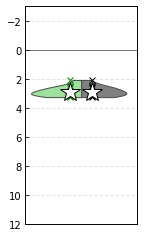

In [37]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()

volc_order=["Baker", "Baker domefield"]
sns.violinplot(x="Sample_ID_Amp", y="Preferred_P",  cut=0, 
               linewidth=1,hue="Model", inner=None,
            data=Combo_Amp, split=True, ax=ax1, width=0.9, order=volc_order, stick=True
              , palette=['lightgreen', 'grey'])

# ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Baker")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Baker")],  
#          'xb')

# ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Baker")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Baker")],  
#          'xr')

# ax1.plot(-0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Baker")]),  
#          '*k', mfc='w', ms=20)

# ax1.plot(0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Baker")]),  
#          '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Baker domefield")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Baker domefield")],  
         'x', mec='green')

ax1.plot(1.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Baker domefield")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Baker domefield")],  
         'x', mec='k')

ax1.plot(0.9,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Baker domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Baker domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([0.5, 1.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Baker_Amp.png', dpi=200)



In [ ]:
Baker_Amp_Press_Filter

In [ ]:
plt.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Baker domefield")]),  
         '*k', mfc='w', ms=20)

In [ ]:
Combo_Amp["Sample_ID_Amp"]

In [ ]:
Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Baker domefield")]